

<a href='https://erdogant.medium.com/membership' target='_blank'><img height='200' style='border:0px;height:36px;' src='https://erdogant.github.io/clusteval/pages/html/_images/logo_large_3.png' border='0' alt='Follow me on Medium' /></a>


Welcome to the notebook of **clusteval**. Clusteval is a Python package for **unsupervised cluster evaluation**. Three well known methods are implemented that can be used to measure the goodness of the clustering approach; *silhouette*, *dbindex*, and *derivative*. The evaluation approaches can be applied on the most commonly used clustering approaches; *agglomerative*, *kmeans*, *dbscan* and *hdbscan*. There is no golden rule to define the optimal number of clusters. It requires investigation, and backtesting.

There are a couple of common methods that can help you:
<br>
<b>* Silhouette-score</b>
<br>
<b>* Inconsistency method</b>
<br>
<b>* Davies-Bouldin index</b>
<br>



---

## Read the Medium blog for more detailed information.

#### [1. A step-by-step guide for clustering images](https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128)

#### [2. Detection of Duplicate Images Using Image Hash Functions](https://towardsdatascience.com/detection-of-duplicate-images-using-image-hash-functions-4d9c53f04a75)

#### [3. From Data to Clusters: When is Your Clustering Good Enough?](https://towardsdatascience.com/from-data-to-clusters-when-is-your-clustering-good-enough-5895440a978a)

#### [4. From Clusters To Insights; The Next Step](https://towardsdatascience.com/from-clusters-to-insights-the-next-step-1c166814e0c6)


---

## Github
* [Github](https://github.com/erdogant/clusteval)
* [Documentation pages](https://erdogant.github.io/clusteval/)

---



**Installation of libraries**

In [ ]:
!pip install -U scatterd
!pip install -U clusteval

In [ ]:
# Libraries
import sys, os
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs, make_circles
from scipy.cluster.hierarchy import inconsistent

import numpy as np
import matplotlib.pyplot as plt

from clusteval import clusteval
from scatterd import scatterd


### Cluster evaluation

Evaluate the goodness of clusters based on the different evaluation approaches. Below are four examples to create messy dataset.  

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


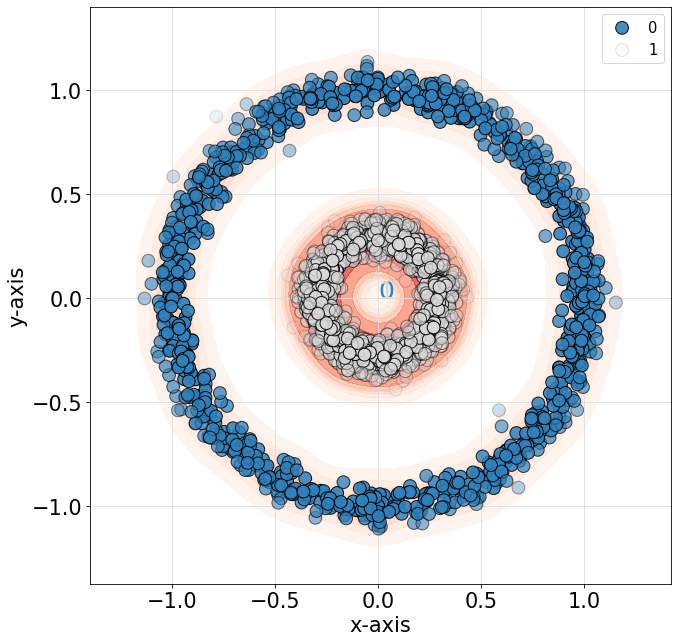

In [ ]:
X1,y1 = make_circles(n_samples=2000, factor=0.3, noise=0.05, random_state=4)
scatterd(X1[:,0],X1[:,1],labels=y1, figsize=(10,10), dpi=75);

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

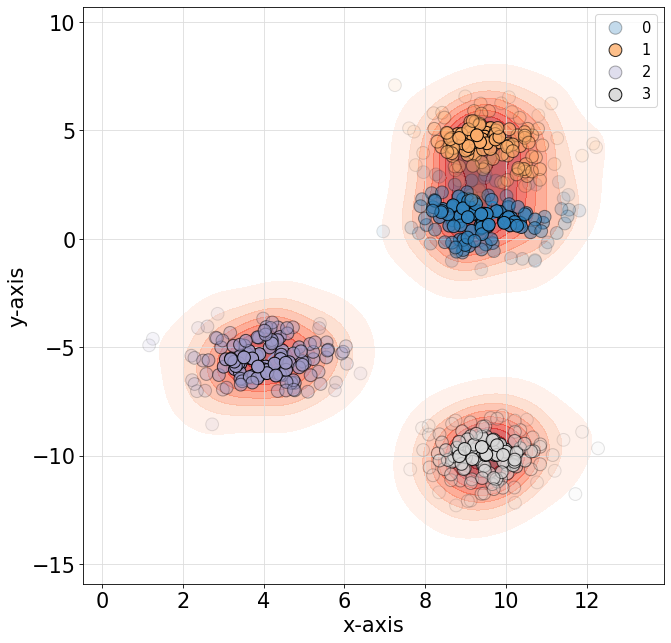

In [ ]:
X2,y2 = make_blobs(n_samples=500, n_features=2, centers=4, random_state=4)
scatterd(X2[:,0],X2[:,1],labels=y2, figsize=(10,10), dpi=75)

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

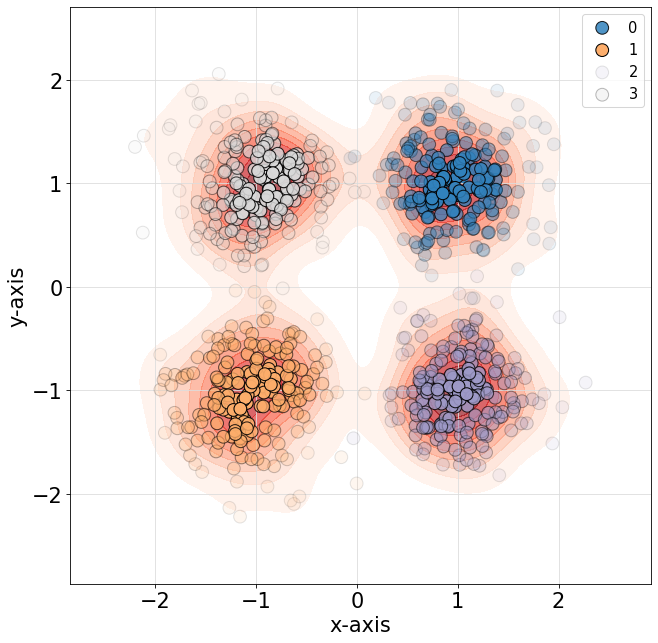

In [ ]:
X3, y3 = make_blobs(n_samples=750, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], cluster_std=0.4,random_state=0)
scatterd(X3[:,0],X3[:,1],labels=y3, figsize=(10,10), dpi=75)

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

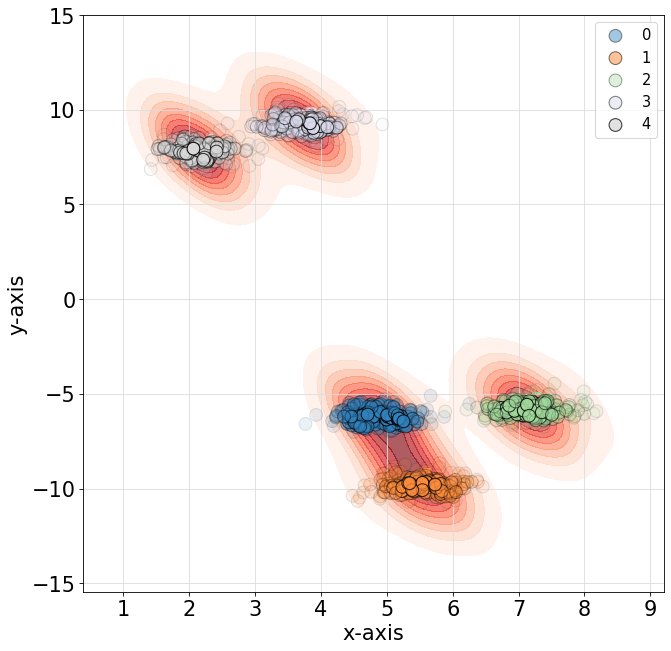

In [ ]:
X4,y4 = make_blobs(n_samples=750, centers=5, n_features=2, cluster_std=0.4)
scatterd(X4[:,0],X4[:,1],labels=y4, figsize=(10,10), dpi=75)

[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>,
 <Axes: title={'center': 'Data seems simple to cluster'}, xlabel='x-axis', ylabel='y-axis'>)

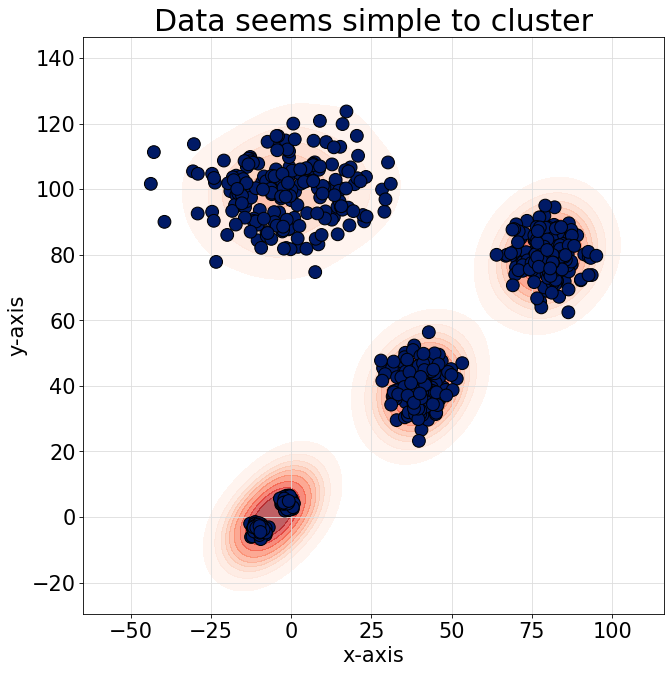

In [ ]:
# Make blobs with variances being extremely different
Xs, _ = make_blobs(n_samples=200, n_features=2, centers=2, random_state=1)
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[200, 1], [1, 100]], size=[200,])
X5 = np.concatenate((Xs, c, d, e),)
scatterd(X5[:,0], X5[:,1], figsize=(10, 10), title='Data seems simple to cluster', dpi=75)


[clusteval] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|██████████| 23/23 [00:01<00:00, 16.54it/s]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:05<00:00,  4.40it/s]
[clusteval] >INFO> Evaluate clustering using [derivatives] method
[clusteval] >INFO> Clusters: 5
[clusteval] >INFO> Gridsearch across Epsilon.
[clusteval] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [00:21<00:00, 11.46it/s]


<Figure size 640x480 with 0 Axes>

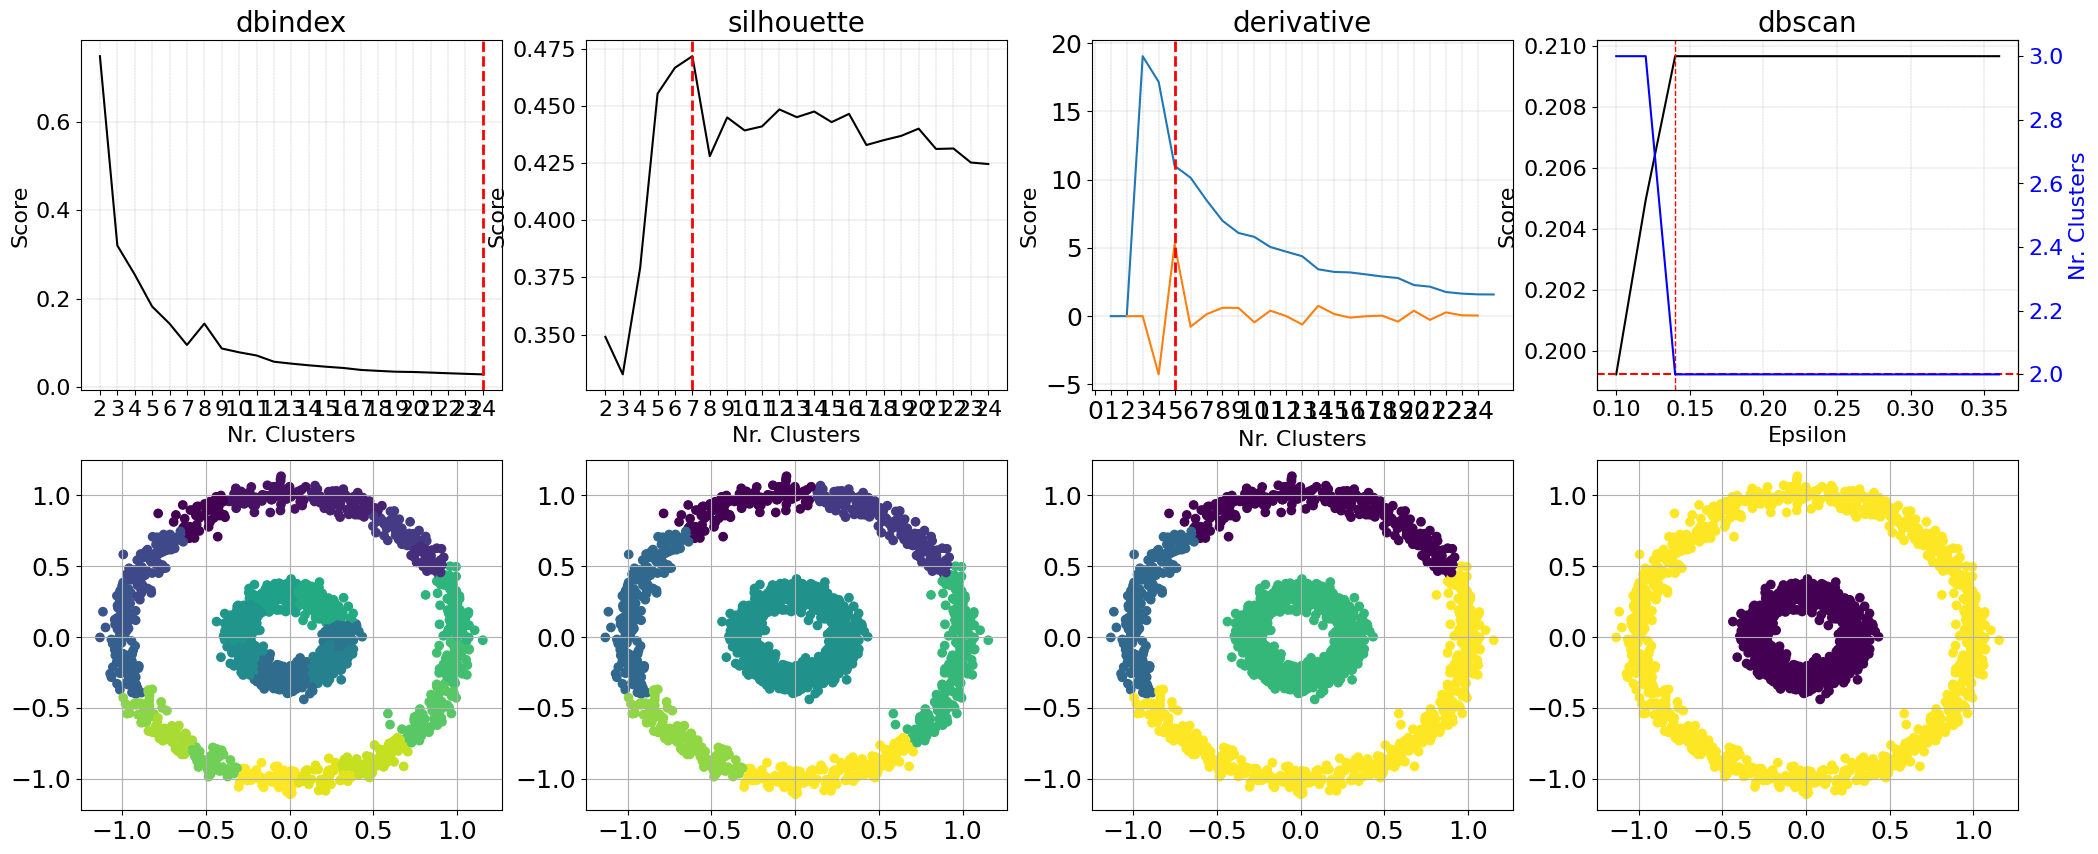

In [ ]:
import clusteval as ce

X = X1

plt.figure()
fig, axs = plt.subplots(2,4, figsize=(25,10))

# dbindex
results = ce.dbindex.fit(X)
_ = ce.dbindex.plot(results, title='dbindex', ax=axs[0][0], showfig=False)
axs[1][0].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][0].grid(True)

# silhouette
results = ce.silhouette.fit(X)
_ = ce.silhouette.plot(results,title='silhouette', ax=axs[0][1], showfig=False)
axs[1][1].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][1].grid(True)

# derivative
results = ce.derivative.fit(X)
_ = ce.derivative.plot(results,title='derivative', ax=axs[0][2], showfig=False)
axs[1][2].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][2].grid(True)

# dbscan
results = ce.dbscan.fit(X)
_ = ce.dbscan.plot(results,title='dbscan', ax=axs[0][3], showfig=False)
axs[1][3].scatter(X[:,0], X[:,1],c=results['labx']);axs[1][3].grid(True)

plt.show()

In [ ]:

# Cluster
Z=linkage(X, method='ward', metric='euclidean')

depth = 5
incons = inconsistent(Z, depth)

#The following shows a matrix of the avg, std, count, inconsistency for each of the last 10 merges of our hierarchical clustering with depth = 5
#Note that the inconsistency values heavily depend on the depth of the tree you calculate the averages over!
incons[-10:]


array([[ 0.60321632,  1.11435982, 31.        ,  4.67077695],
       [ 0.63577154,  1.17618716, 31.        ,  4.64387283],
       [ 0.84109501,  1.33868085, 31.        ,  4.59503809],
       [ 1.44400414,  1.98966743, 31.        ,  3.54568839],
       [ 0.99806369,  1.93619221, 31.        ,  4.72518097],
       [ 1.06434126,  2.10943129, 31.        ,  4.71723153],
       [ 2.28528824,  3.4675396 , 31.        ,  4.29146436],
       [ 3.45154006,  4.65552057, 31.        ,  3.350682  ],
       [ 2.13700812,  4.03553765, 31.        ,  4.48283153],
       [ 5.56381285,  6.30845962, 31.        ,  2.79542084]])

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate clustering using [derivatives] method
[clusteval] >INFO> Clusters: 5
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [4].
[clusteval] >INFO> Fin.


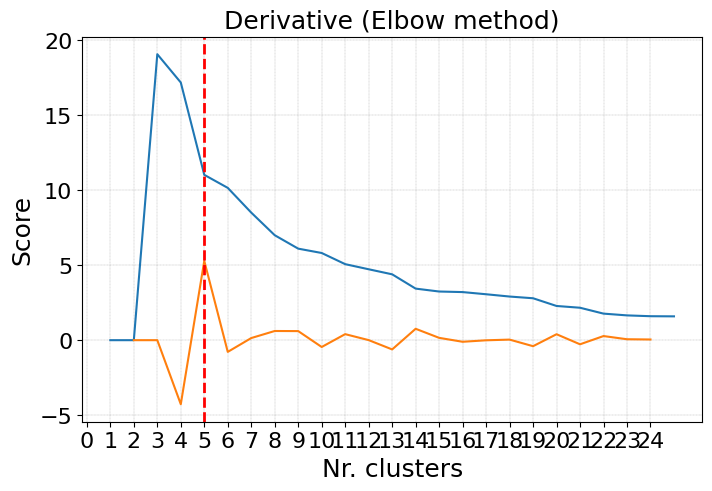

In [ ]:
# Cluster evaluation with the elbow method
cl = clusteval(evaluate='derivative', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
ax = cl.plot(figsize=(8,5))

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:02<00:00, 11.09it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [7].
[clusteval] >INFO> Fin.


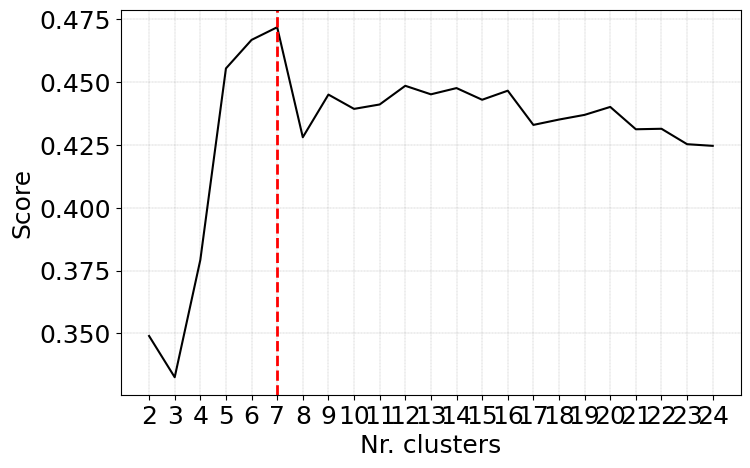

(<Figure size 800x500 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='silhouette', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 45.67it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.


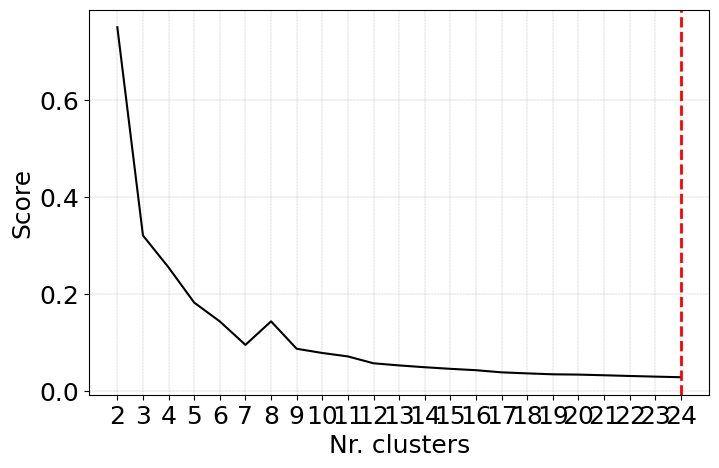

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


(<Figure size 1000x1000 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

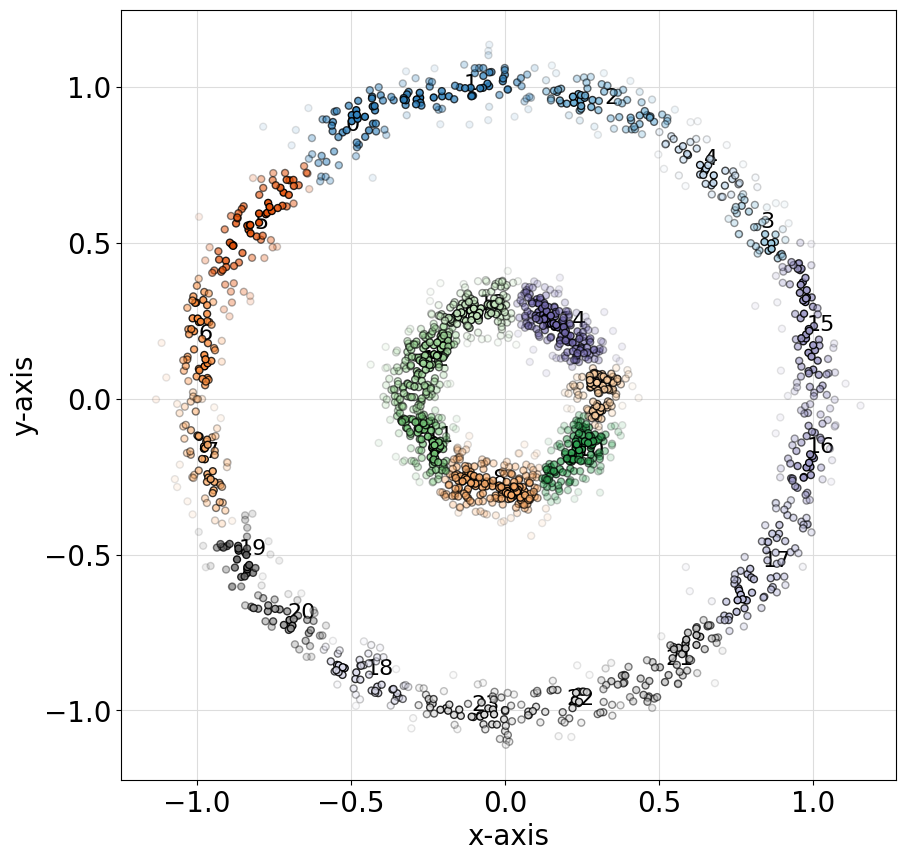

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='dbindex', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))
cl.scatter(X, figsize=(10, 10))

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[dbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Gridsearch across Epsilon.
[clusteval] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [00:13<00:00, 17.79it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


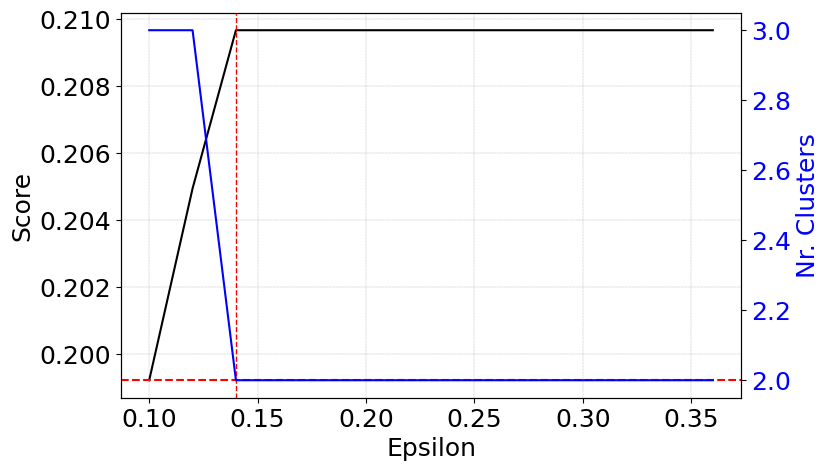

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


(<Figure size 1000x1000 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

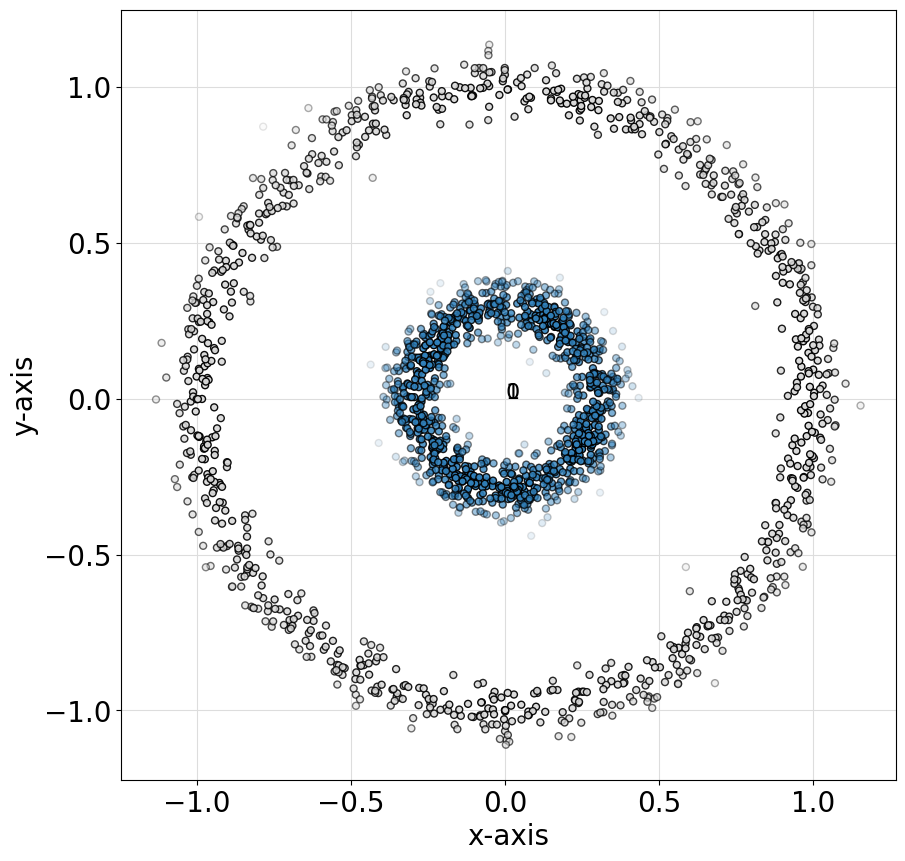

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(cluster='dbscan', evaluate='silhouette', linkage='ward', metric='euclidean')
cl_results=cl.fit(X)
cl.plot(figsize=(8,5))
cl.scatter(X, figsize=(10, 10))
#plt.scatter(X[:,0], X[:,1])


[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

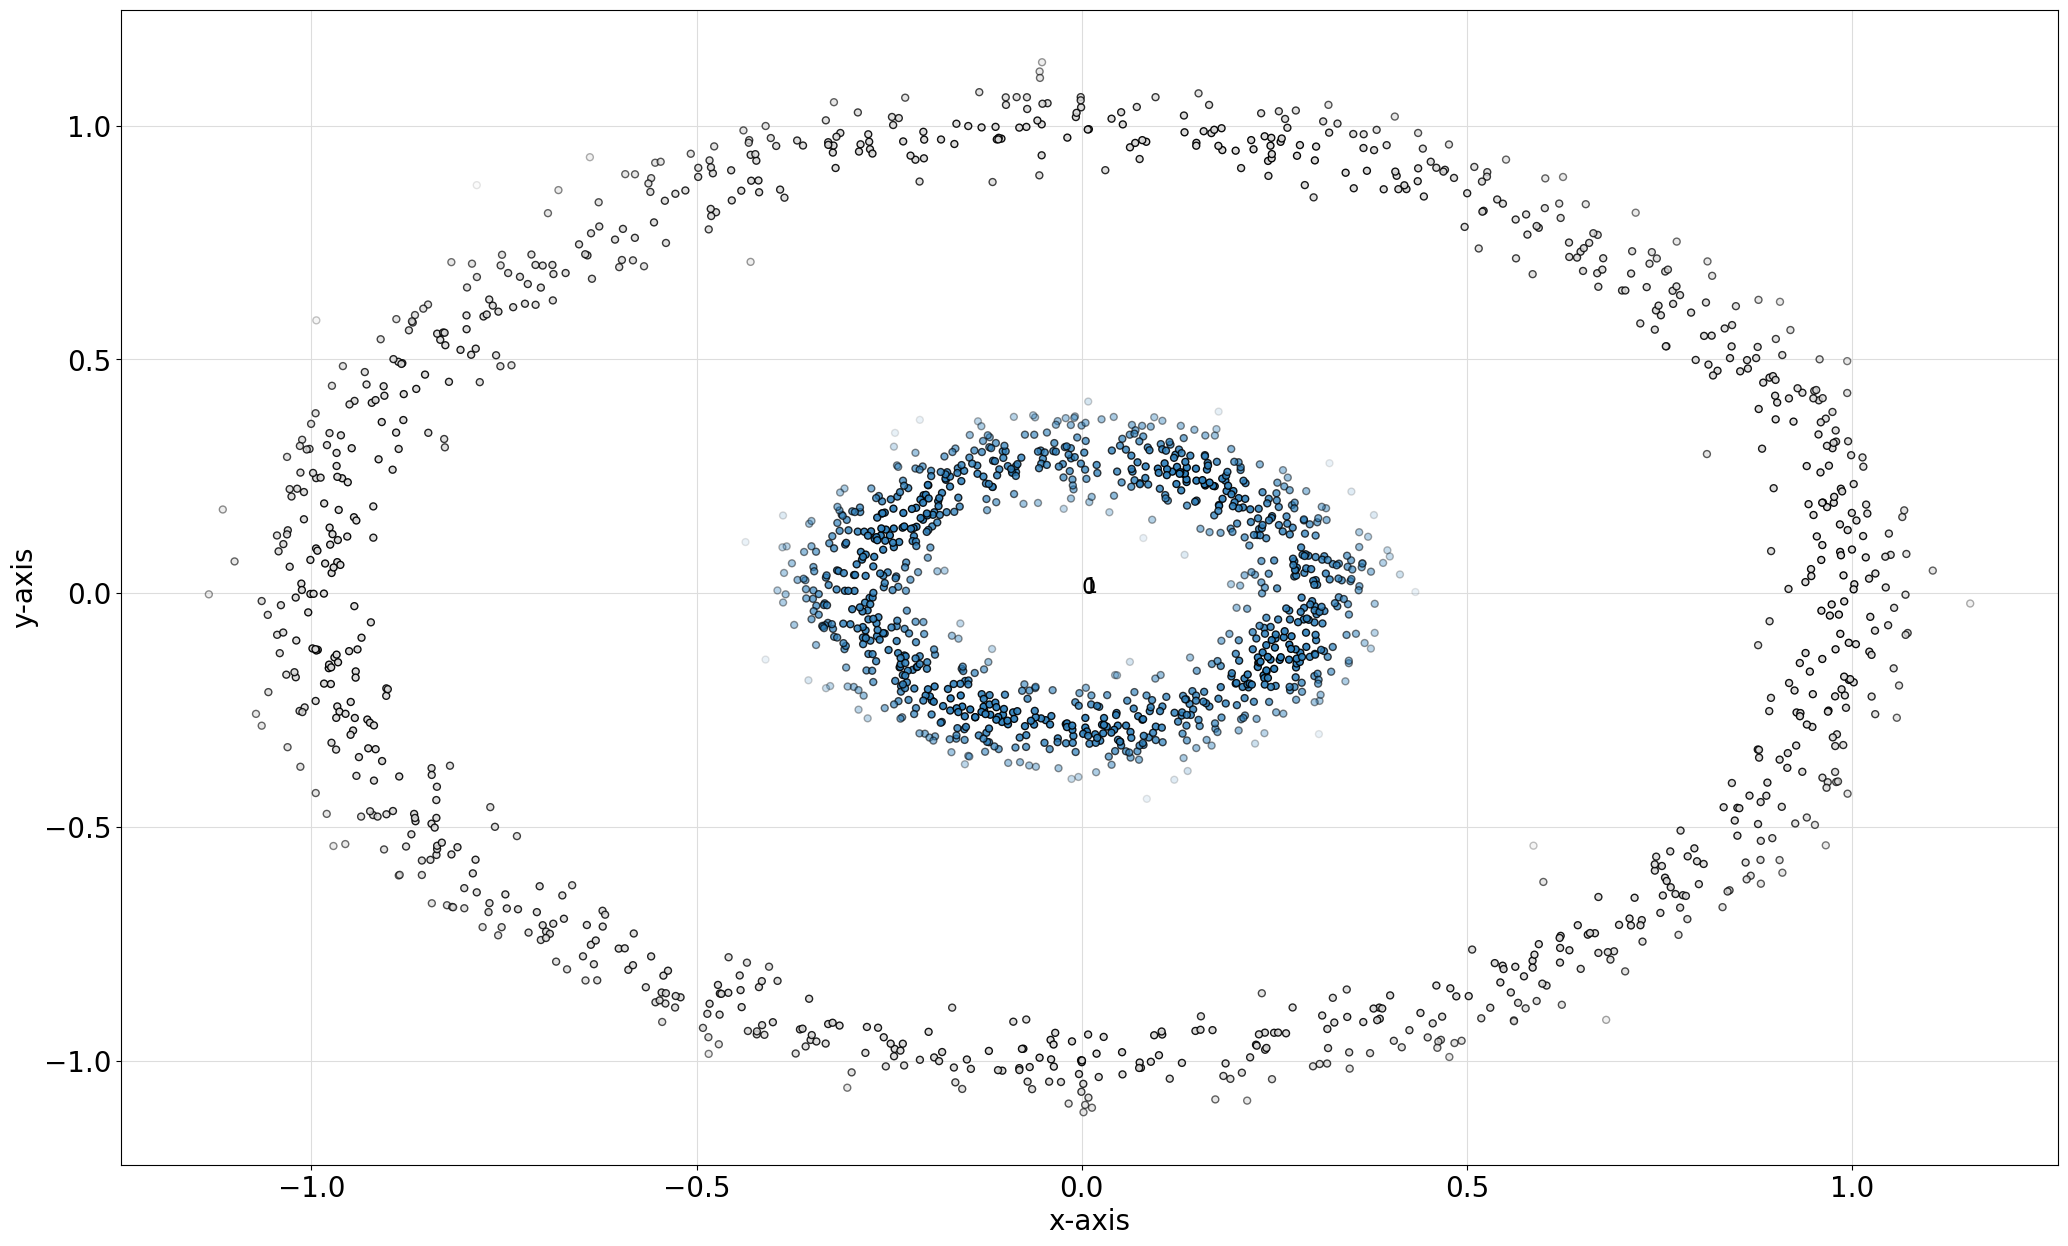

In [ ]:
cl.scatter(X)

### Clusters with different densities
Evaluate the optimal number of clusters when there is <b>very</b> different variances in the different clusters:

[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>,
 <Axes: title={'center': 'Data seems simple to cluster'}, xlabel='x-axis', ylabel='y-axis'>)

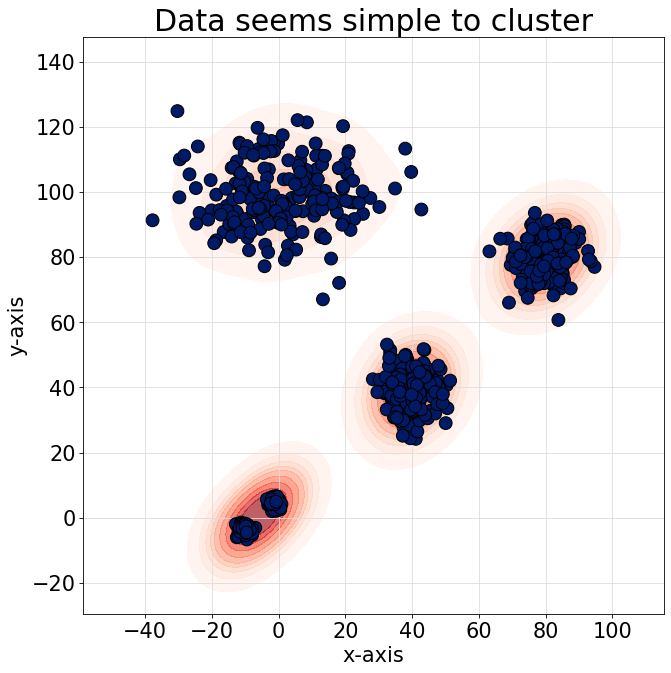

In [ ]:
# Make blobs with variances being extremely different
X, labx = make_blobs(n_samples=200, n_features=2, centers=2, random_state=1)
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[200, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
scatterd(X2[:,0], X2[:,1], figsize=(10, 10), title='Data seems simple to cluster', dpi=75)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate clustering using [derivatives] method
[clusteval] >INFO> Clusters: 4
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [4].
[clusteval] >INFO> Fin.


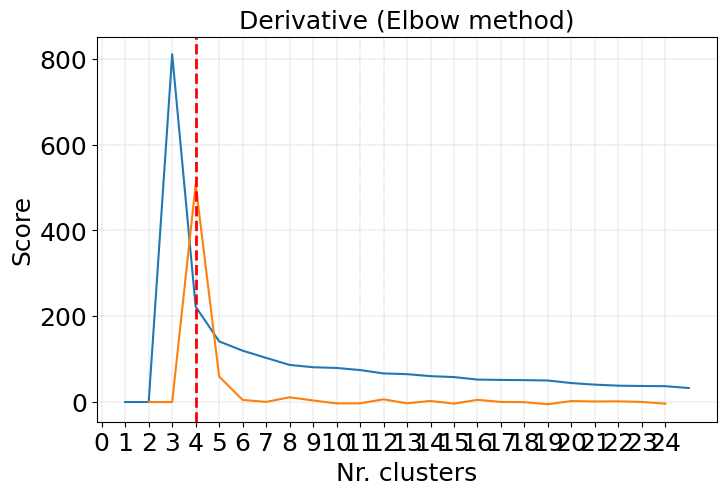

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

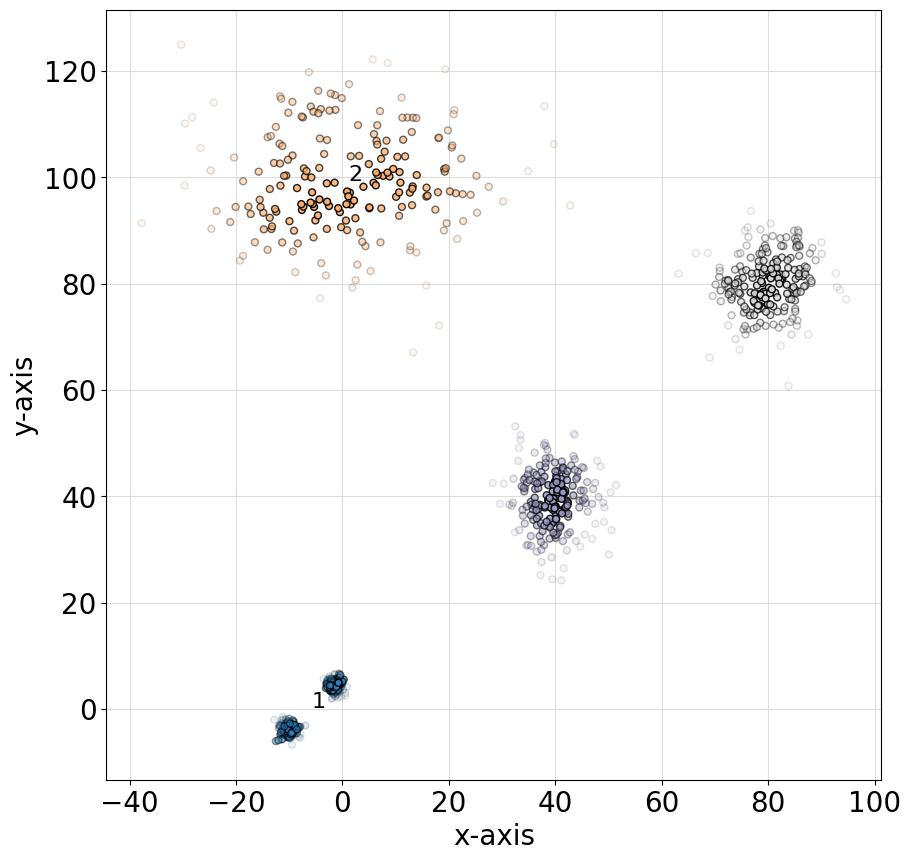

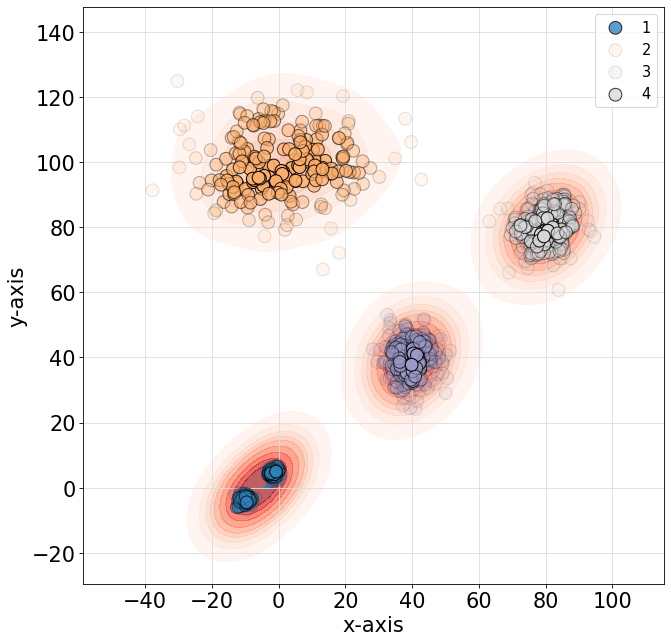

In [ ]:
# Cluster evaluation with silhouette score
cl = clusteval(evaluate='derivative', linkage='ward', metric='euclidean')
# cl = clusteval(evaluate='silhouette', linkage='ward', metric='euclidean')
# cl = clusteval(evaluate='dbindex', linkage='ward', metric='euclidean', max_clust=10)

cl_results=cl.fit(X2)
cl.plot(figsize=(8,5))

# scatter plot
cl.scatter(X2, figsize=(10, 10))
scatterd(X2[:,0], X2[:,1], labels=cl.results['labx'], figsize=(10, 10), dpi=75)


[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=516.728. Be patient now..
[clusteval] >INFO> Compute cluster labels.


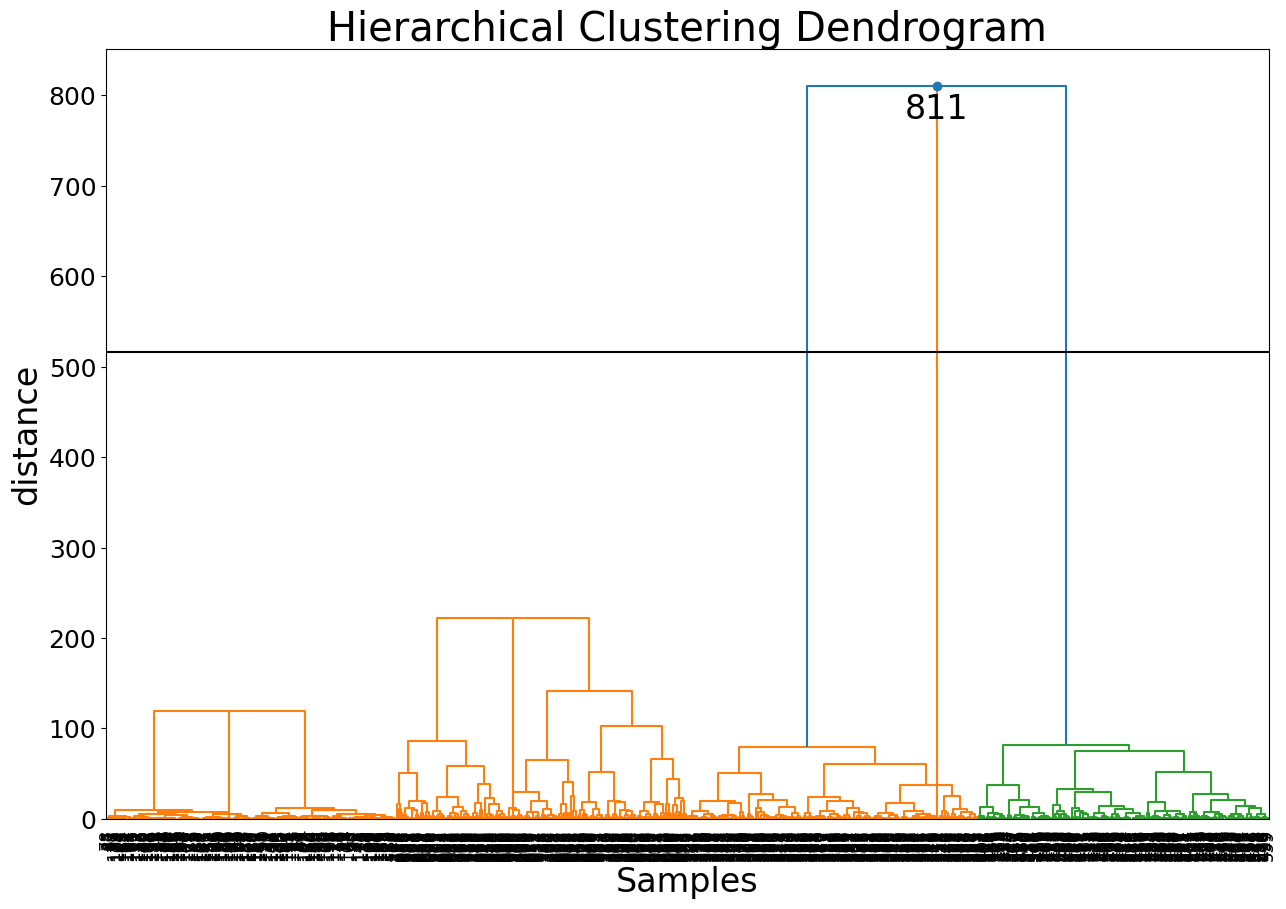

In [ ]:
cl.dendrogram();


#### Explore what exactly happens in the dendrogram when number of samples and variances differ across clusters:
Try to set depth at 60 and 80

### Horizontal cut in dendrogram
There is <b>NO</b> horizontal cut that gives the optimum number of clusters. How would you proceed now?

### DBSCAN

<br>1.The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.
<br>2. Clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.
<br>3. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density.
<br>4. A cluster is therefore a set of <b>core</b> samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).
<br>5. The DBSCAN algorithm is deterministic, always generating the same clusters when given the same data in the same order.

<br>There are two parameters to the algorithm how <b>we</b> define <b>dense</b>
    * min_samples
    * eps
As an example, higher min_samples or lower eps indicate higher density necessary to form a cluster.
<br>The current implementation uses <i>ball trees</i> and <i>kd-trees</i> to determine the neighborhood of points, which avoids calculating the full distance matrix

In [ ]:
#!pip install hdbscan

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[dbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Gridsearch across Epsilon.
[clusteval] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|██████████| 245/245 [00:09<00:00, 26.84it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [7].
[clusteval] >INFO> Fin.


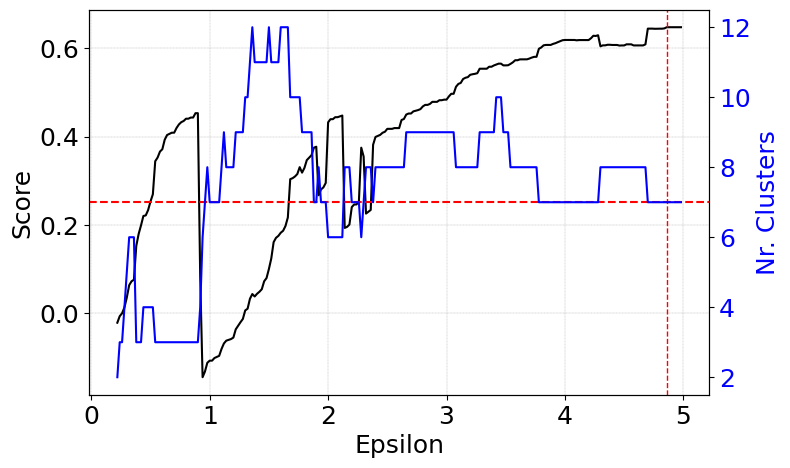

(<Figure size 800x500 with 2 Axes>,
 (<Axes: xlabel='Epsilon', ylabel='Score'>, <Axes: ylabel='Nr. Clusters'>))

In [ ]:
# Cluster evaluation with silhouette score
# cl = clusteval(cluster='hdbscan', linkage='ward', metric='euclidean')
cl = clusteval(cluster='dbscan', linkage='ward', metric='euclidean')

cl_results=cl.fit(X2)
cl.plot(figsize=(8,5))

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Create scatterplot
[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 750x750 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

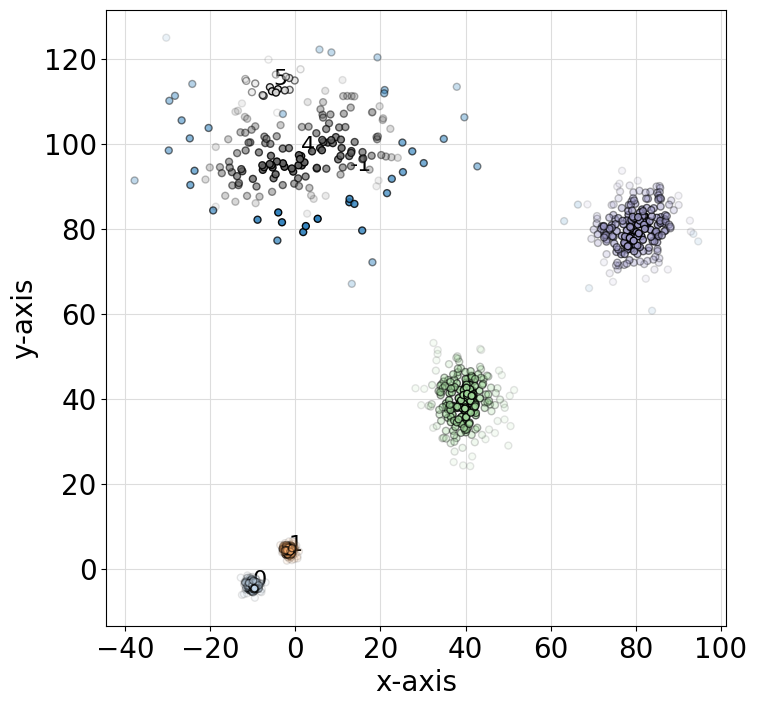

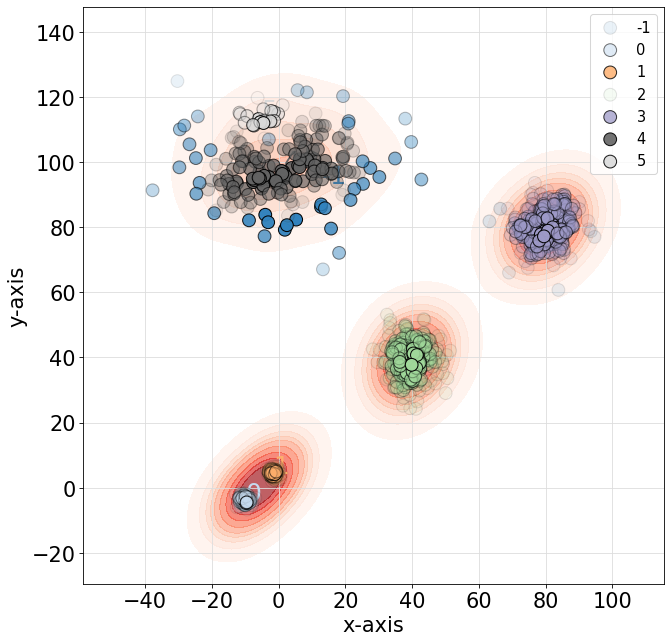

In [ ]:
# scatter plot
cl.scatter(X2, figsize=(8, 8))
scatterd(X2[:,0], X2[:,1], labels=cl.results['labx'], figsize=(10, 10), dpi=75)


In [ ]:
# Fin